# **Análise e Predição de Tarifas da Uber: Explorando Padrões e Construindo Modelos Preditivos:**

## Seções do notebook:



*   Importação das bibliotecas.
*   Análise exploratória de dados.
*   Tratamento da base de dados.
*   Definição do método analítico.
*   Definição das métricas de acurácia.




## Importação das Bibliotecas python utilizadas no projeto:

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



*   Pandas:  Manipulação e análise de dados
*   Numpy: Trabalha com arrays multidimensionais e funções matemáticas de alto desempenho.
*   Matplotlib: Cria gráficos e visualizações de dados.
*   Seaborn: Visualização de dados estatísticos.
*   folium: Cria mapas interativos.
*   Sklearn.model_selection.train_test_split: Divide os dados em conjuntos de treino e teste para validação de modelos.
*  Sklearn.linear_model.LinearRegression: Criam e ajustam modelos de regressão linear.
*  Sklearn.metrics.mean_squared_error e r2_score: Avaliam a performance de modelos de aprendizado de máquina.






## Dataset Utilizado na análise exploratória:

Dataset retirado do kaggle: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset?resource=download

In [59]:
df = pd.read_csv('uber.csv')
print(df)

        Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225 

## Análise exploratória de dados:

É feita para obtermos insights e coletar informações importantes. Deve-se examinar os dados e resumir suas principais características.

### Número de linhas e colunas do dataframe:

In [60]:
l, c = df.shape
print(f'O dataframe apresenta: {l} linhas e {c} colunas')


O dataframe apresenta: 200000 linhas e 9 colunas


### Limpeza dos dados



Esses passos envolvem a identificação e o tratamento de valores ausentes, outliers e a transformação de dados, quando necessário:

In [61]:
# Informações gerais do dataframe:
print(df.dtypes)
print(df.info())
print(df.describe())


Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
        

 Removendo unnamed 0:

In [62]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

Identificar e tratar valores ausentes:

In [63]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


Substituindo as linhas que contêm valores nulos:

In [64]:
median_longitude = df['dropoff_longitude'].median()
median_latitude = df['dropoff_latitude'].median()

df['dropoff_longitude'] = df['dropoff_longitude'].fillna(median_longitude)
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(median_latitude)

Convertendo pickup_datetime para o tipo datetime:

In [65]:
# Convertendi pickup_datetime para o tipo datetime:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
# Tratando possíveis erros de conversão e removendo registros inválidos:
df = df[df['pickup_datetime'].notnull()]


Removendo as tarifas negativas ou zero:

In [66]:
df = df[df['fare_amount'] > 0]

Tratando o passenger_count:

In [67]:
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

Validando o dataset limpo:

In [68]:
print(df.isnull().sum())
print(df.info())
print(df.describe())
print(df.head())


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 199268 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                199268 non-null  object             
 1   fare_amount        199268 non-null  float64            
 2   pickup_datetime    199268 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199268 non-null  float64            
 4   pickup_latitude    199268 non-null  float64            
 5   dropoff_longitude  199268 non-null  float64            
 6   dropoff_latitude   199268 non-null  float64            
 7   passenger_count    199268 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 13.7+ MB
N

### Medidas de posição:

As principais medidas de posição são as de tendência central: média, mediana e moda e as separatrizes: quartis, decis e percentis.

A **Média** tem como função medir a tendência central de um conjunto de dados. Serve, por exemplo, para identificar tendências ao longo do tempo e para análises estatísticas. A média é mais representativa quando os dados têm uma distribuição simétrica e não contêm outliers significativos.

In [69]:
# média
media_fare_amount = df['fare_amount'].mean()
media_pickup_longitude = df['pickup_longitude'].mean()
media_pickup_latitude = df['pickup_latitude'].mean()
media_dropoff_longitude = df['dropoff_longitude'].mean()
media_dropoff_latitude = df['dropoff_latitude'].mean()
media_passenger_count = df['passenger_count'].mean()
print(f'A média da coluna fare_amount é: {media_fare_amount}')
print(f'A média da coluna pickup_longitude é: {media_pickup_longitude}')
print(f'A média da coluna pickup_latitude é: {media_pickup_latitude}')
print(f'A média da coluna dropoff_longitude é: {media_dropoff_longitude}')
print(f'A média da coluna dropoff_latitude é: {media_dropoff_latitude}')
print(f'A média da coluna passenger_count é: {media_passenger_count}')


A média da coluna fare_amount é: 11.369417668667321
A média da coluna pickup_longitude é: -72.53011263615645
A média da coluna pickup_latitude é: 39.93718237674515
A média da coluna dropoff_longitude é: -72.52814194742179
A média da coluna dropoff_latitude é: 39.92535001572686
A média da coluna passenger_count é: 1.6894383443402854


Não é necessário calcular a média de "key" pois ela é um identificador único, e nem de "pickup_datetime" pois é uma data.


In [70]:
# Verificando se todas as chaves são únicas ou se há duplicatas
df['key'].nunique()  # Número de chaves únicas
df['key'].duplicated().sum()  # Número de duplicatas

np.int64(0)

A **Mediana** é uma medida de tendência central que representa o valor que divide um conjunto de dados em duas partes iguais. Ela tem foco em análises mais descritivas e não é afetada por outliers (valores muito altos ou muito baixos), tornando-se eficiente quando os dados possuem distribuições assimétricas.

In [71]:
# Mediana
mediana_fare_amount = df['fare_amount'].median()
mediana_pickup_datetime = df['pickup_datetime'].median()
mediana_pickup_longitude = df['pickup_longitude'].median()
mediana_pickup_latitude = df['pickup_latitude'].median()
mediana_dropoff_longitude = df['dropoff_longitude'].median()
mediana_dropoff_latitude = df['dropoff_latitude'].median()
mediana_passenger_count = df['passenger_count'].median()
print(f'A mediana da coluna fare_amount é: {mediana_fare_amount}')
print(f'A mediana da coluna pickup_datetime é: {mediana_pickup_datetime}')
print(f'A mediana da coluna pickup_longitude é: {mediana_pickup_longitude}')
print(f'A mediana da coluna pickup_latitude é: {mediana_pickup_latitude}')
print(f'A mediana da coluna dropoff_longitude é: {mediana_dropoff_longitude}')
print(f'A mediana da coluna dropoff_latitude é: {mediana_dropoff_latitude}')
print(f'A mediana da coluna passenger_count é: {mediana_passenger_count}')

A mediana da coluna fare_amount é: 8.5
A mediana da coluna pickup_datetime é: 2012-03-24 06:15:24+00:00
A mediana da coluna pickup_longitude é: -73.981825
A mediana da coluna pickup_latitude é: 40.7525835
A mediana da coluna dropoff_longitude é: -73.98009499999999
A mediana da coluna dropoff_latitude é: 40.75304115686035
A mediana da coluna passenger_count é: 1.0


A **moda** é uma medida de tendência central que representa o valor ou os valores que aparecem com mais frequência em um conjunto de dados.

In [72]:
moda_fare_amount = df['fare_amount'].mode()
moda_pickup_longitude = df['pickup_longitude'].mode()
moda_pickup_latitude = df['pickup_latitude'].mode()
moda_dropoff_longitude = df['dropoff_longitude'].mode()
moda_dropoff_latitude = df['dropoff_latitude'].mode()
moda_passenger_count = df['passenger_count'].mode()
print(f'A moda da coluna fare_amount é: {moda_fare_amount}')
print(f'A moda da coluna pickup_longitude é: {moda_pickup_longitude}')
print(f'A moda da coluna pickup_latitude é: {moda_pickup_latitude}')
print(f'A moda da coluna dropoff_longitude é: {moda_dropoff_longitude}')
print(f'A moda da coluna dropoff_latitude é: {moda_dropoff_latitude}')
print(f'A moda da coluna passenger_count é: {moda_passenger_count}')

A moda da coluna fare_amount é: 0    6.5
Name: fare_amount, dtype: float64
A moda da coluna pickup_longitude é: 0    0.0
Name: pickup_longitude, dtype: float64
A moda da coluna pickup_latitude é: 0    0.0
Name: pickup_latitude, dtype: float64
A moda da coluna dropoff_longitude é: 0    0.0
Name: dropoff_longitude, dtype: float64
A moda da coluna dropoff_latitude é: 0    0.0
Name: dropoff_latitude, dtype: float64
A moda da coluna passenger_count é: 0    1
Name: passenger_count, dtype: int64


Verificando quantos valores 0.0 existem em cada coluna das coordenadas: pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude.

In [73]:
print(df['pickup_longitude'].value_counts().get(0.0, 0))  # Quantos 0.0 na coluna pickup_longitude
print(df['pickup_latitude'].value_counts().get(0.0, 0))   # Quantos 0.0 na coluna pickup_latitude
print(df['dropoff_longitude'].value_counts().get(0.0, 0)) # Quantos 0.0 na coluna dropoff_longitude
print(df['dropoff_latitude'].value_counts().get(0.0, 0))  # Quantos 0.0 na coluna dropoff_latitude


3765
3761
3742
3736


Os **quartis** são pontos de divisão de uma amostra de dados em quatro segmentos de tamanho igual. Eles permitem analisar a dispersão entre o valor mínimo e o valor máximo do conjunto de dados, além de ajudar a identificar valores atípicos (outliers). Vale destacar que a diferença entre o Q1 e o Q3 é conhecida como intervalo interquartil (IQR), enquanto o Q2, ou 0.5, representa a mediana.


In [74]:
# quartis:
quartis_fare_amount = df['fare_amount'].quantile([0.25, 0.5, 0.75])
quartis_pickup_longitude = df['pickup_longitude'].quantile([0.25, 0.5, 0.75])
quartis_pickup_latitude = df['pickup_latitude'].quantile([0.25, 0.5, 0.75])
quartis_dropoff_longitude = df['dropoff_longitude'].quantile([0.25, 0.5, 0.75])
quartis_dropoff_latitude = df['dropoff_latitude'].quantile([0.25, 0.5, 0.75])
quartis_passenger_count = df['passenger_count'].quantile([0.25, 0.5, 0.75])
print(f'Os quartis da coluna fare_amount são:\n{quartis_fare_amount}')
print(f'Os quartis da coluna pickup_longitude são:\n{quartis_pickup_longitude}')
print(f'Os quartis da coluna pickup_latitude são:\n{quartis_pickup_latitude}')
print(f'Os quartis da coluna dropoff_longitude são:\n{quartis_dropoff_longitude}')
print(f'Os quartis da coluna dropoff_latitude são:\n{quartis_dropoff_latitude}')
print(f'Os quartis da coluna passenger_count são:\n{quartis_passenger_count}')


Os quartis da coluna fare_amount são:
0.25     6.0
0.50     8.5
0.75    12.5
Name: fare_amount, dtype: float64
Os quartis da coluna pickup_longitude são:
0.25   -73.992065
0.50   -73.981825
0.75   -73.967162
Name: pickup_longitude, dtype: float64
Os quartis da coluna pickup_latitude são:
0.25    40.734796
0.50    40.752584
0.75    40.767157
Name: pickup_latitude, dtype: float64
Os quartis da coluna dropoff_longitude são:
0.25   -73.991410
0.50   -73.980095
0.75   -73.963664
Name: dropoff_longitude, dtype: float64
Os quartis da coluna dropoff_latitude são:
0.25    40.733828
0.50    40.753041
0.75    40.767995
Name: dropoff_latitude, dtype: float64
Os quartis da coluna passenger_count são:
0.25    1.0
0.50    1.0
0.75    2.0
Name: passenger_count, dtype: float64


**Decis** são valores que segmentam um conjunto de dados em dez partes iguais, onde cada decis corresponde a 10% do total. Eles são ferramentas úteis para analisar a posição relativa de um dado específico dentro de um conjunto maior, facilitando a compreensão da distribuição dos valores.

In [75]:
# Decis:
decis_fare_amount = df['fare_amount'].quantile(np.arange(0, 1.1, 0.1))
decis_pickup_longitude = df['pickup_longitude'].quantile(np.arange(0, 1.1, 0.1))
decis_pickup_latitude = df['pickup_latitude'].quantile(np.arange(0, 1.1, 0.1))
decis_dropoff_longitude = df['dropoff_longitude'].quantile(np.arange(0, 1.1, 0.1))
decis_dropoff_latitude = df['dropoff_latitude'].quantile(np.arange(0, 1.1, 0.1))
decis_passenger_count = df['passenger_count'].quantile(np.arange(0, 1.1, 0.1))
print(f'Os decis da coluna fare_amount são:\n{decis_fare_amount}')
print(f'Os decis da coluna pickup_longitude são:\n{decis_pickup_longitude}')
print(f'Os decis da coluna pickup_latitude são:\n{decis_pickup_latitude}')
print(f'Os decis da coluna dropoff_longitude são:\n{decis_dropoff_longitude}')
print(f'Os decis da coluna dropoff_latitude são:\n{decis_dropoff_latitude}')
print(f'Os decis da coluna passenger_count são:\n{decis_passenger_count}')

Os decis da coluna fare_amount são:
0.0      0.01
0.1      4.50
0.2      5.50
0.3      6.50
0.4      7.30
0.5      8.50
0.6      9.70
0.7     11.50
0.8     14.10
0.9     20.50
1.0    499.00
Name: fare_amount, dtype: float64
Os decis da coluna pickup_longitude são:
0.0   -1340.648410
0.1     -74.002760
0.2     -73.994602
0.3     -73.990087
0.4     -73.985853
0.5     -73.981825
0.6     -73.977322
0.7     -73.971272
0.8     -73.962135
0.9     -73.950781
1.0      57.418457
Name: pickup_longitude, dtype: float64
Os decis da coluna pickup_latitude são:
0.0     -74.015515
0.1      40.718227
0.2      40.729883
0.3      40.739517
0.4      40.746567
0.5      40.752584
0.6      40.758640
0.7      40.763919
0.8      40.771027
0.9      40.779845
1.0    1644.421482
Name: pickup_latitude, dtype: float64
Os decis da coluna dropoff_longitude são:
0.0   -3356.666300
0.1     -74.002992
0.2     -73.994180
0.3     -73.989219
0.4     -73.984410
0.5     -73.980095
0.6     -73.975350
0.7     -73.968858
0.8   

Os **percentis** particionam um conjunto de dados em cem partes iguais, sendo que cada percentil representa a posição relativa de um dado em comparação com os demais no conjunto.

In [76]:
# Percentil
# Exemplo 80 º percentil:
percentil_80_fare_amount = df['fare_amount'].quantile(0.8)
percentil_80_pickup_longitude = df['pickup_longitude'].quantile(0.8)
percentil_80_pickup_latitude = df['pickup_latitude'].quantile(0.8)
percentil_80_dropoff_longitude = df['dropoff_longitude'].quantile(0.8)
percentil_80_dropoff_latitude = df['dropoff_latitude'].quantile(0.8)
percentil_80_passenger_count = df['passenger_count'].quantile(0.8)
print(f'O 80º percentil da coluna fare_amount é: {percentil_80_fare_amount}')
print(f'O 80º percentil da coluna pickup_longitude é: {percentil_80_pickup_longitude}')
print(f'O 80º percentil da coluna pickup_latitude é: {percentil_80_pickup_latitude}')
print(f'O 80º percentil da coluna dropoff_longitude é: {percentil_80_dropoff_longitude}')
print(f'O 80º percentil da coluna dropoff_latitude é: {percentil_80_dropoff_latitude}')
print(f'O 80º percentil da coluna passenger_count é: {percentil_80_passenger_count}')

O 80º percentil da coluna fare_amount é: 14.1
O 80º percentil da coluna pickup_longitude é: -73.9621353149414
O 80º percentil da coluna pickup_latitude é: 40.771027
O 80º percentil da coluna dropoff_longitude é: -73.958448
O 80º percentil da coluna dropoff_latitude é: 40.7723662
O 80º percentil da coluna passenger_count é: 2.0


### Medidas de dispersão:

Absoluta: variância, desvio e amplitude. Relativa: Coeficiente de variação.

A **variância** quantifica o grau de dispersão dos dados em torno da média, indicando o quanto os valores se afastam, em média, do valor central.

In [77]:
# variância
variancia_fare_amount = df['fare_amount'].var()
variancia_pickup_longitude = df['pickup_longitude'].var()
variancia_pickup_latitude = df['pickup_latitude'].var()
variancia_dropoff_longitude = df['dropoff_longitude'].var()
variancia_dropoff_latitude = df['dropoff_latitude'].var()
variancia_passenger_count = df['passenger_count'].var()
print(f'A variância da coluna fare_amount é: {variancia_fare_amount}')
print(f'A variância da coluna pickup_longitude é: {variancia_pickup_longitude}')
print(f'A variância da coluna pickup_latitude é: {variancia_pickup_latitude}')
print(f'A variância da coluna dropoff_longitude é: {variancia_dropoff_longitude}')
print(f'A variância da coluna dropoff_latitude é: {variancia_dropoff_latitude}')
print(f'A variância da coluna passenger_count é: {variancia_passenger_count}')

A variância da coluna fare_amount é: 98.1264021209224
A variância da coluna pickup_longitude é: 130.7416964413215
A variância da coluna pickup_latitude é: 59.65523356869771
A variância da coluna dropoff_longitude é: 172.1093977764024
A variância da coluna dropoff_latitude é: 46.160645950163655
A variância da coluna passenger_count é: 1.704034747044168


O **desvio padrão** é a raiz quadrada da variância e serve como uma medida de variabilidade, indicando o quanto os dados estão distribuídos em relação à média.

In [78]:
# desvio padrão
desvio_padrao_fare_amount = df['fare_amount'].std
desvio_padrao_pickup_longitude = df['pickup_longitude'].std()
desvio_padrao_pickup_latitude = df['pickup_latitude'].std()
desvio_padrao_dropoff_longitude = df['dropoff_longitude'].std()
desvio_padrao_dropoff_latitude = df['dropoff_latitude'].std()
desvio_padrao_passenger_count = df['passenger_count'].std()
print(f'O desvio padrão da coluna fare_amount é:\n{desvio_padrao_fare_amount}')
print(f'O desvio padrão da coluna pickup_longitude é:\n{desvio_padrao_pickup_longitude}')
print(f'O desvio padrão da coluna pickup_latitude é:\n{desvio_padrao_pickup_latitude}')
print(f'O desvio padrão da coluna dropoff_longitude é:\n{desvio_padrao_dropoff_longitude}')
print(f'O desvio padrão da coluna dropoff_latitude é:\n{desvio_padrao_dropoff_latitude}')
print(f'O desvio padrão da coluna passenger_count é:\n{desvio_padrao_passenger_count}')

O desvio padrão da coluna fare_amount é:
<bound method Series.std of 0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199268, dtype: float64>
O desvio padrão da coluna pickup_longitude é:
11.43423353099461
O desvio padrão da coluna pickup_latitude é:
7.723680053491193
O desvio padrão da coluna dropoff_longitude é:
13.119047136755109
O desvio padrão da coluna dropoff_latitude é:
6.7941626378946545
O desvio padrão da coluna passenger_count é:
1.3053868189330577


A **Amplitude** é a diferença entre o valor máximo e o valor mínimo.

In [79]:
# amplitude
amplitude_fare_amount = df['fare_amount'].max() - df['fare_amount'].min()
amplitude_pickup_longitude = df['pickup_longitude'].max() - df['pickup_longitude'].min()
amplitude_pickup_latitude = df['pickup_latitude'].max() - df['pickup_latitude'].min()
amplitude_dropoff_longitude = df['dropoff_longitude'].max() - df['dropoff_longitude'].min()
amplitude_dropoff_latitude = df['dropoff_latitude'].max() - df['dropoff_latitude'].min()
amplitude_passenger_count = df['passenger_count'].max() - df['passenger_count'].min()
print(f'A amplitude da coluna fare_amount é: {amplitude_fare_amount}')
print(f'A amplitude da coluna pickup_longitude é: {amplitude_pickup_longitude}')
print(f'A amplitude da coluna pickup_latitude é: {amplitude_pickup_latitude}')
print(f'A amplitude da coluna dropoff_longitude é: {amplitude_dropoff_longitude}')
print(f'A amplitude da coluna dropoff_latitude é: {amplitude_dropoff_latitude}')
print(f'A amplitude da coluna passenger_count é: {amplitude_passenger_count}')

A amplitude da coluna fare_amount é: 498.99
A amplitude da coluna pickup_longitude é: 1398.066867
A amplitude da coluna pickup_latitude é: 1718.436997
A amplitude da coluna dropoff_longitude é: 4510.2389029999995
A amplitude da coluna dropoff_latitude é: 1754.683141
A amplitude da coluna passenger_count é: 5


O **coeficiente de variação** é uma medida estatística que expressa o desvio padrão como uma porcentagem da média. Ele é usado para avaliar a variabilidade relativa de um conjunto de dados em relação à sua média.

In [80]:
# coeficiente de variação:
cv_fare_amount = df['fare_amount'].std() / df['fare_amount'].mean()
cv_pickup_longitude = df['pickup_longitude'].std() / df['pickup_longitude'].mean()
cv_pickup_latitude = df['pickup_latitude'].std() / df['pickup_latitude'].mean()
cv_dropoff_longitude = df['dropoff_longitude'].std() / df['dropoff_longitude'].mean()
cv_dropoff_latitude = df['dropoff_latitude'].std() / df['dropoff_latitude'].mean()
cv_passenger_count = df['passenger_count'].std() / df['passenger_count'].mean()
print(f'O coeficiente de variação da coluna fare_amount é: {cv_fare_amount}')
print(f'O coeficiente de variação da coluna pickup_longitude é: {cv_pickup_longitude}')
print(f'O coeficiente de variação da coluna pickup_latitude é: {cv_pickup_latitude}')
print(f'O coeficiente de variação da coluna dropoff_longitude é: {cv_dropoff_longitude}')
print(f'O coeficiente de variação da coluna dropoff_latitude é: {cv_dropoff_latitude}')
print(f'O coeficiente de variação da coluna passenger_count é: {cv_passenger_count}')

O coeficiente de variação da coluna fare_amount é: 0.8712739244161666
O coeficiente de variação da coluna pickup_longitude é: -0.1576480873310352
O coeficiente de variação da coluna pickup_latitude é: 0.19339571782080905
O coeficiente de variação da coluna dropoff_longitude é: -0.180882162213194
O coeficiente de variação da coluna dropoff_latitude é: 0.1701716487198832
O coeficiente de variação da coluna passenger_count é: 0.7726750273581618


### Distribuição e frequência:



**Histogramas:** ajudam a visualizar a distribuição e frequência dos dados.

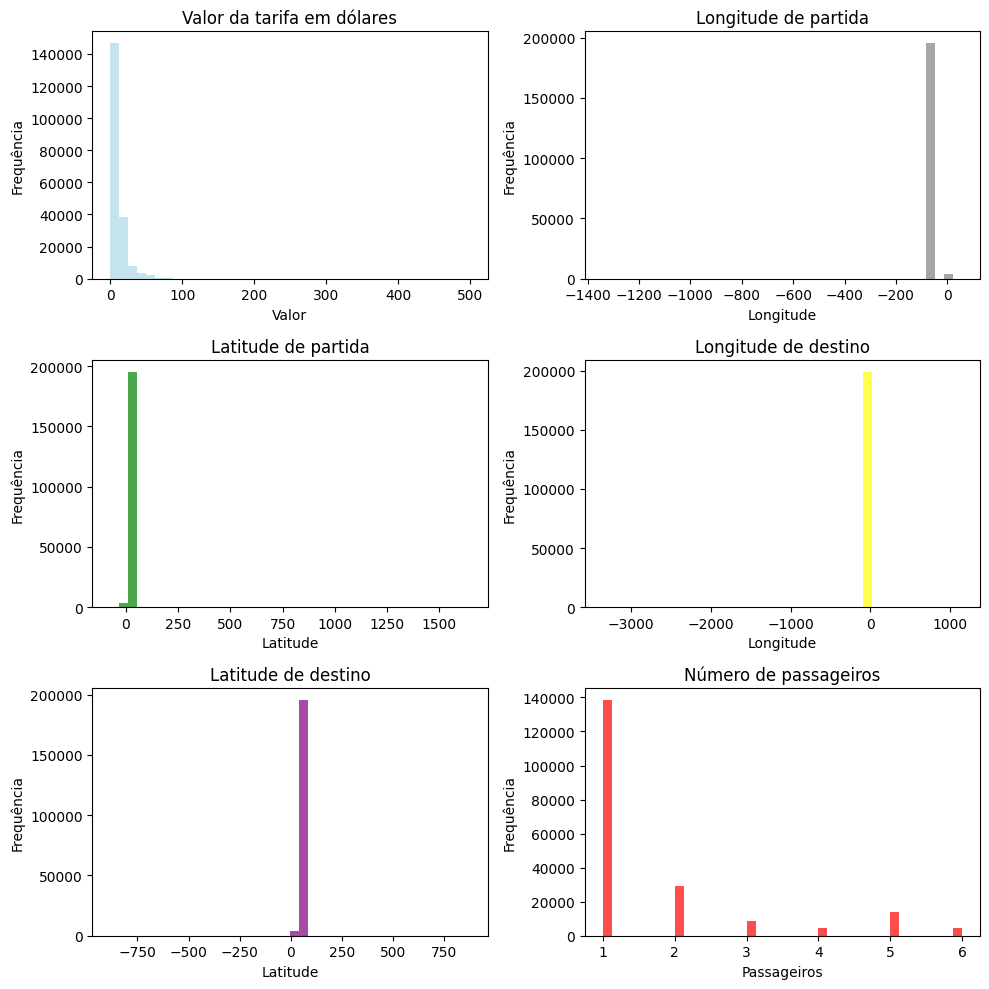

In [81]:
# Histogramas
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.hist(df['fare_amount'], bins=40, color='lightblue', alpha=0.7)
plt.title('Valor da tarifa em dólares')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(3, 2, 2)
plt.hist(df['pickup_longitude'], bins=40, color='gray', alpha=0.7)
plt.title('Longitude de partida')
plt.xlabel('Longitude')
plt.ylabel('Frequência')

plt.subplot(3, 2, 3)
plt.hist(df['pickup_latitude'], bins=40, color='green', alpha=0.7)
plt.title('Latitude de partida')
plt.xlabel('Latitude')
plt.ylabel('Frequência')

plt.subplot(3, 2, 4)
plt.hist(df['dropoff_longitude'], bins=40, color='yellow', alpha=0.7)
plt.title('Longitude de destino')
plt.xlabel('Longitude')
plt.ylabel('Frequência')

plt.subplot(3, 2, 5)
plt.hist(df['dropoff_latitude'], bins=40, color='purple', alpha=0.7)
plt.title('Latitude de destino')
plt.xlabel('Latitude')
plt.ylabel('Frequência')

plt.subplot(3, 2, 6)
plt.hist(df['passenger_count'], bins=40, color='red', alpha=0.7)
plt.title('Número de passageiros')
plt.xlabel('Passageiros')
plt.ylabel('Frequência')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

**Boxplot:** Facilitar a identificação da mediana, dos quartis e dos outliers.

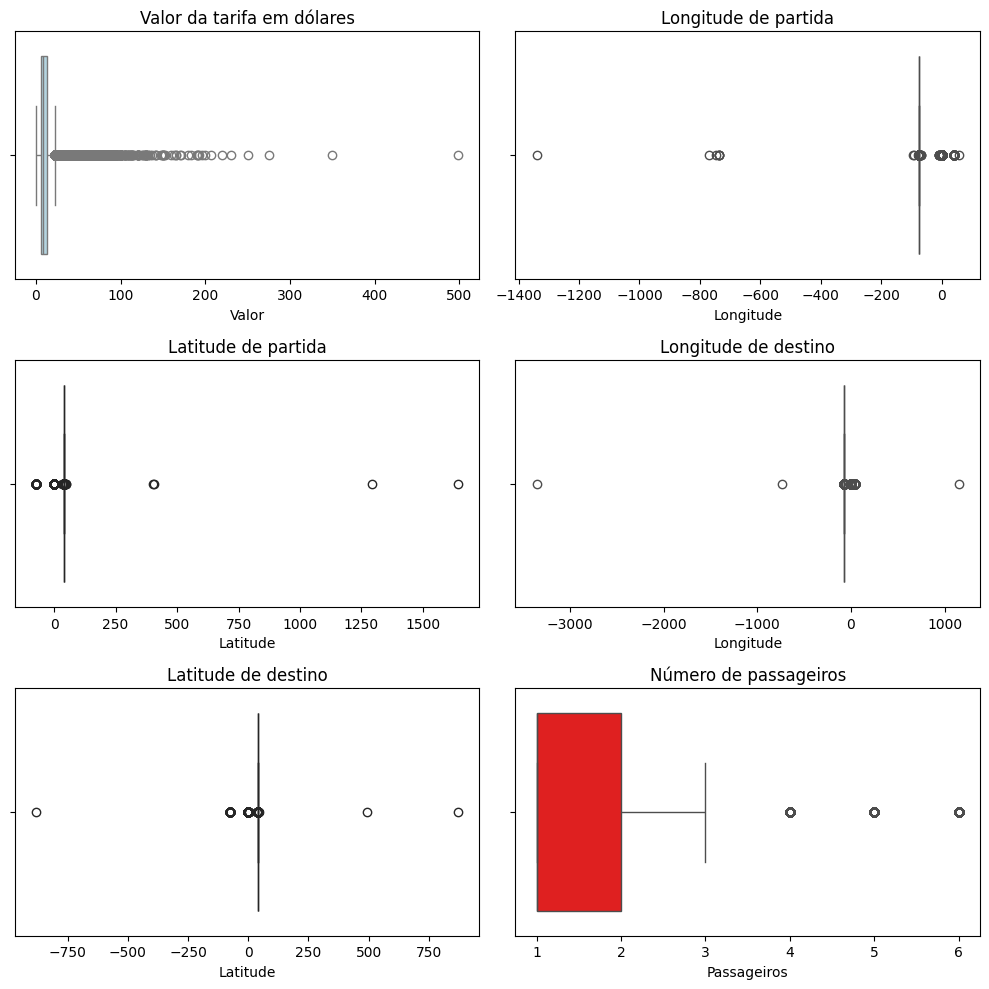

In [82]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
sns.boxplot(x=df['fare_amount'], color='lightblue')
plt.title('Valor da tarifa em dólares')
plt.xlabel('Valor')

plt.subplot(3, 2, 2)
sns.boxplot(x=df['pickup_longitude'], color='gray')
plt.title('Longitude de partida')
plt.xlabel('Longitude')

plt.subplot(3, 2, 3)
sns.boxplot(x=df['pickup_latitude'], color='green')
plt.title('Latitude de partida')
plt.xlabel('Latitude')

plt.subplot(3, 2, 4)
sns.boxplot(x=df['dropoff_longitude'], color='yellow')
plt.title('Longitude de destino')
plt.xlabel('Longitude')

plt.subplot(3, 2, 5)
sns.boxplot(x=df['dropoff_latitude'], color='purple')
plt.title('Latitude de destino')
plt.xlabel('Latitude')

plt.subplot(3, 2, 6)
sns.boxplot(x=df['passenger_count'], color='red')
plt.title('Número de passageiros')
plt.xlabel('Passageiros')

plt.tight_layout()
plt.show()

Nota-se que nos valores relacionados a latitudes e longitudes há a predominância de zero e números próximos a ele.

### Gráficos de dispersão:


são usados para analisar a relação entre duas variáveis.

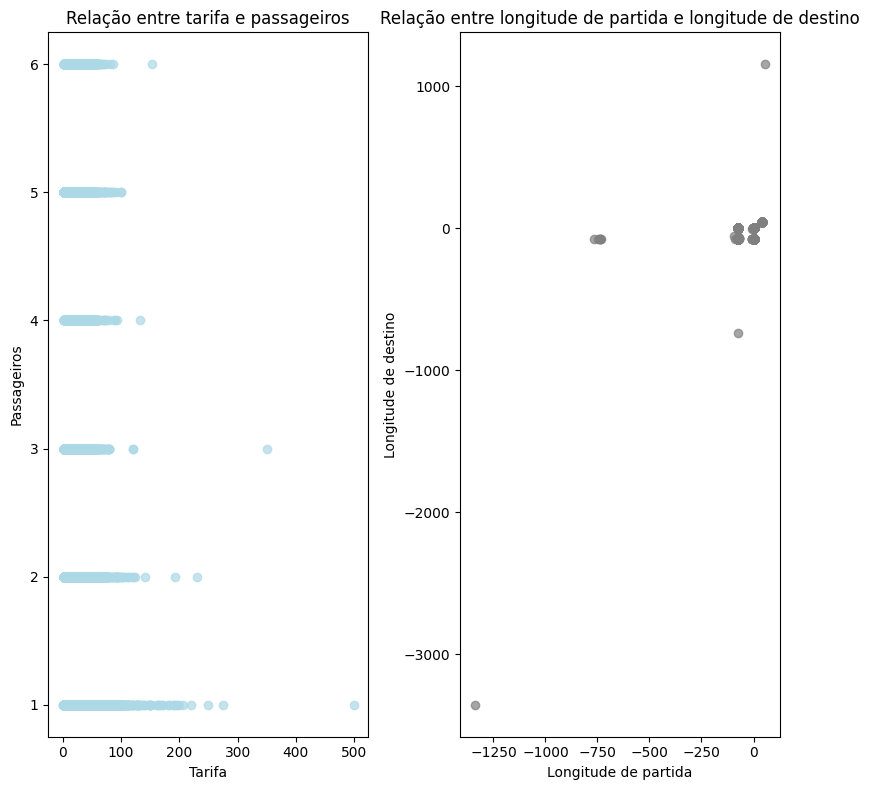

In [83]:
# Relação entre fare_amount e passenger_count
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.scatter(df['fare_amount'], df['passenger_count'], color='lightblue', alpha=0.7)
plt.title('Relação entre tarifa e passageiros')
plt.xlabel('Tarifa')
plt.ylabel('Passageiros')

# Relação entre pickup_longitude e dropoff_longitude

plt.subplot(1, 2, 2)
plt.scatter(df['pickup_longitude'], df['dropoff_longitude'], color='gray', alpha=0.7)
plt.title('Relação entre longitude de partida e longitude de destino')
plt.xlabel ('Longitude de partida')
plt.ylabel('Longitude de destino')

plt.tight_layout()
plt.show()


### Correlações:

Medir o grau de associação entre as variáveis no conjunto de dados.

In [84]:
# correlações entre fare_amount e passenger_count:
corr_fare_amount_passenger_count = df[['fare_amount', 'passenger_count']].corr()
print(corr_fare_amount_passenger_count)

                 fare_amount  passenger_count
fare_amount         1.000000         0.010175
passenger_count     0.010175         1.000000


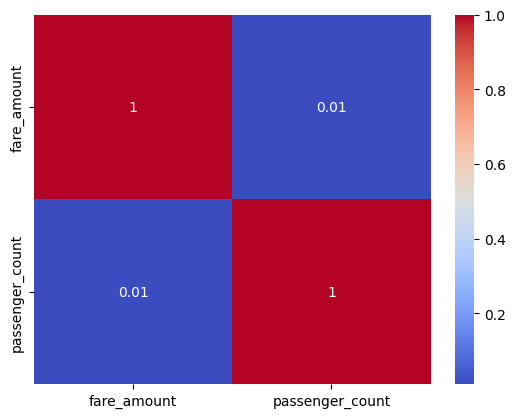

In [85]:
#mapa de calor:
sns.heatmap(corr_fare_amount_passenger_count, annot=True, cmap='coolwarm')
plt.show()

In [86]:
# correlações entre fare_amount, pickup_longitude e dropoff_longitude:
corr_fare_amount_pickup_longitude_dropoff_longitude = df[['fare_amount', 'pickup_longitude', 'dropoff_longitude']].corr()
print(corr_fare_amount_pickup_longitude_dropoff_longitude)

                   fare_amount  pickup_longitude  dropoff_longitude
fare_amount           1.000000          0.010420           0.009064
pickup_longitude      0.010420          1.000000           0.833047
dropoff_longitude     0.009064          0.833047           1.000000


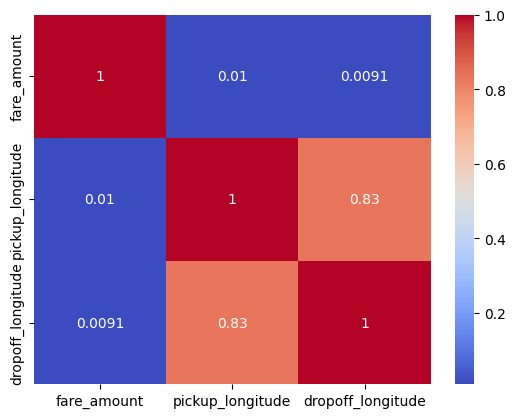

In [87]:
# mapa de calor
sns.heatmap(corr_fare_amount_pickup_longitude_dropoff_longitude, annot=True, cmap='coolwarm')
plt.show()

### Anomalias e outliers:

Identificar observações que se afastam drasticamente do padrão geral dos dados.

In [88]:
# outliers em fare_amount:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_fare_amount = df[(df['fare_amount'] < Q1 - 1.5 * IQR) | (df['fare_amount'] > Q3 + 1.5 * IQR)]

print('Limite inferior:', limite_inferior)
print('Limite superior:', limite_superior)
print(outliers_fare_amount)


Limite inferior: -3.75
Limite superior: 22.25
                                  key  fare_amount           pickup_datetime  \
6         2014-10-12 07:04:00.0000002        24.50 2014-10-12 07:04:00+00:00   
30       2011-05-21 09:00:00.00000031        25.70 2011-05-21 09:00:00+00:00   
34      2014-06-04 06:49:00.000000102        39.50 2014-06-04 06:49:00+00:00   
39      2014-02-13 17:57:00.000000102        29.00 2014-02-13 17:57:00+00:00   
48        2013-01-03 22:24:41.0000002        56.80 2013-01-03 22:24:41+00:00   
...                               ...          ...                       ...   
199976  2011-10-18 23:53:00.000000145        49.70 2011-10-18 23:53:00+00:00   
199977    2012-11-20 21:04:30.0000001        43.50 2012-11-20 21:04:30+00:00   
199982    2014-08-06 11:06:06.0000001        57.33 2014-08-06 11:06:06+00:00   
199985    2015-04-18 15:16:06.0000005        24.00 2015-04-18 15:16:06+00:00   
199997   2009-06-29 00:42:00.00000078        30.90 2009-06-29 00:42:00+00:

In [89]:
# outliers em passenger_count:
Q1 = df['passenger_count'].quantile(0.25)
Q3 = df['passenger_count'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_passenger_count = df[(df['passenger_count'] < Q1 - 1.5 * IQR) | (df['passenger_count'] > Q3 + 1.5 * IQR)]

print('Limite inferior:', limite_inferior)
print('Limite superior:', limite_superior)
print(outliers_passenger_count)

Limite inferior: -0.5
Limite superior: 3.5
                                  key  fare_amount           pickup_datetime  \
4       2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00+00:00   
6         2014-10-12 07:04:00.0000002         24.5 2014-10-12 07:04:00+00:00   
12      2011-05-17 14:03:00.000000158          3.3 2011-05-17 14:03:00+00:00   
24      2010-05-12 22:32:00.000000200         12.9 2010-05-12 22:32:00+00:00   
29       2011-12-24 02:52:00.00000056          7.3 2011-12-24 02:52:00+00:00   
...                               ...          ...                       ...   
199958   2012-08-25 20:25:00.00000042         15.7 2012-08-25 20:25:00+00:00   
199959  2011-07-05 18:51:00.000000133          8.1 2011-07-05 18:51:00+00:00   
199962   2010-01-23 22:38:00.00000031         11.7 2010-01-23 22:38:00+00:00   
199969   2013-05-18 21:14:00.00000063         14.0 2013-05-18 21:14:00+00:00   
199985    2015-04-18 15:16:06.0000005         24.0 2015-04-18 15:16:06+00:00 

In [90]:
# outliers em pickup_longitude:
Q1 = df['pickup_longitude'].quantile(0.25)
Q3 = df['pickup_longitude'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_pickup_longitude = df[(df['pickup_longitude'] < Q1 - 1.5 * IQR) | (df['pickup_longitude'] > Q3 + 1.5 * IQR)]

print('Limite inferior:', limite_inferior)
print('Limite superior:', limite_superior)
print(outliers_pickup_longitude)


Limite inferior: -74.02942024999999
Limite superior: -73.92980625000001
                                  key  fare_amount           pickup_datetime  \
4       2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00+00:00   
7        2012-12-11 13:52:00.00000029          2.5 2012-12-11 13:52:00+00:00   
11       2011-05-23 22:15:00.00000086          8.5 2011-05-23 22:15:00+00:00   
34      2014-06-04 06:49:00.000000102         39.5 2014-06-04 06:49:00+00:00   
65       2014-05-05 19:27:00.00000034          6.0 2014-05-05 19:27:00+00:00   
...                               ...          ...                       ...   
199936   2012-07-21 16:19:00.00000099          4.1 2012-07-21 16:19:00+00:00   
199937  2011-04-24 20:03:00.000000118         28.1 2011-04-24 20:03:00+00:00   
199960    2014-12-31 20:57:05.0000001         24.5 2014-12-31 20:57:05+00:00   
199963    2012-09-22 07:46:01.0000002         39.0 2012-09-22 07:46:01+00:00   
199972    2010-08-20 13:19:55.0000001         45

In [91]:
# outliers em pickup_latitude:
Q1 = df['pickup_latitude'].quantile(0.25)
Q2 = df['pickup_latitude'].quantile(0.5)
Q3 = df['pickup_latitude'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_pickup_latitude = df[(df['pickup_latitude'] < Q1 - 1.5 * IQR) | (df['pickup_latitude'] > Q3 + 1.5 * IQR)]

print('Limite inferior:', limite_inferior)
print('Limite superior:', limite_superior)
print(outliers_pickup_latitude)

Limite inferior: 40.68625387500001
Limite superior: 40.81569887499999
                                  key  fare_amount           pickup_datetime  \
7        2012-12-11 13:52:00.00000029          2.5 2012-12-11 13:52:00+00:00   
11       2011-05-23 22:15:00.00000086          8.5 2011-05-23 22:15:00+00:00   
30       2011-05-21 09:00:00.00000031         25.7 2011-05-21 09:00:00+00:00   
34      2014-06-04 06:49:00.000000102         39.5 2014-06-04 06:49:00+00:00   
53        2012-12-09 02:12:29.0000004          7.5 2012-12-09 02:12:29+00:00   
...                               ...          ...                       ...   
199917    2013-06-24 22:17:43.0000002          4.5 2013-06-24 22:17:43+00:00   
199926    2015-05-30 08:30:28.0000003         33.0 2015-05-30 08:30:28+00:00   
199960    2014-12-31 20:57:05.0000001         24.5 2014-12-31 20:57:05+00:00   
199963    2012-09-22 07:46:01.0000002         39.0 2012-09-22 07:46:01+00:00   
199972    2010-08-20 13:19:55.0000001         45.0

In [92]:
# outliers em dropoff_longitude:
Q1 = df['dropoff_longitude'].quantile(0.25)
Q3 = df['dropoff_longitude'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_dropoff_longitude = df[(df['dropoff_longitude'] < Q1 - 1.5 * IQR) | (df['dropoff_longitude'] > Q3 + 1.5 * IQR)]

print('Limite inferior:', limite_inferior)
print('Limite superior:', limite_superior)
print(outliers_dropoff_longitude)

Limite inferior: -74.03302900000001
Limite superior: -73.92204499999998
                                  key  fare_amount           pickup_datetime  \
6         2014-10-12 07:04:00.0000002        24.50 2014-10-12 07:04:00+00:00   
7        2012-12-11 13:52:00.00000029         2.50 2012-12-11 13:52:00+00:00   
11       2011-05-23 22:15:00.00000086         8.50 2011-05-23 22:15:00+00:00   
34      2014-06-04 06:49:00.000000102        39.50 2014-06-04 06:49:00+00:00   
39      2014-02-13 17:57:00.000000102        29.00 2014-02-13 17:57:00+00:00   
...                               ...          ...                       ...   
199965    2013-03-24 15:25:56.0000003        34.94 2013-03-24 15:25:56+00:00   
199976  2011-10-18 23:53:00.000000145        49.70 2011-10-18 23:53:00+00:00   
199977    2012-11-20 21:04:30.0000001        43.50 2012-11-20 21:04:30+00:00   
199982    2014-08-06 11:06:06.0000001        57.33 2014-08-06 11:06:06+00:00   
199997   2009-06-29 00:42:00.00000078        30.

In [93]:
# outliers em dropff_latitude:
Q1 = df['dropoff_latitude'].quantile(0.25)
Q3 = df['dropoff_latitude'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 - 1.5 * IQR

outliers_dropoff_latitude = df[(df['dropoff_latitude'] < Q1 - 1.5 * IQR) | (df['dropoff_latitude'] > Q3 + 1.5 * IQR)]

print('Limite inferior:', limite_inferior)
print('Limite superior:', limite_superior)
print(outliers_dropoff_latitude)

Limite inferior: 40.68257687500001
Limite superior: 40.716744125000005
                                 key  fare_amount           pickup_datetime  \
7       2012-12-11 13:52:00.00000029         2.50 2012-12-11 13:52:00+00:00   
11      2011-05-23 22:15:00.00000086         8.50 2011-05-23 22:15:00+00:00   
53       2012-12-09 02:12:29.0000004         7.50 2012-12-09 02:12:29+00:00   
65      2014-05-05 19:27:00.00000034         6.00 2014-05-05 19:27:00+00:00   
82       2012-06-24 01:35:45.0000006        26.10 2012-06-24 01:35:45+00:00   
...                              ...          ...                       ...   
199926   2015-05-30 08:30:28.0000003        33.00 2015-05-30 08:30:28+00:00   
199963   2012-09-22 07:46:01.0000002        39.00 2012-09-22 07:46:01+00:00   
199965   2013-03-24 15:25:56.0000003        34.94 2013-03-24 15:25:56+00:00   
199977   2012-11-20 21:04:30.0000001        43.50 2012-11-20 21:04:30+00:00   
199982   2014-08-06 11:06:06.0000001        57.33 2014-08-06

### Tratando e substituindo os valores 0.0 em pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude:

Se você identificar valores 0.0, uma abordagem comum é substituí-los pela mediana ou média das outras coordenadas válidas. A mediana geralmente é preferida para evitar o impacto de valores extremos (outliers).

In [94]:
# Substituir valores 0.0 ou fora do intervalo válido com a mediana da coluna

# Substituir para pickup_longitude
df['pickup_longitude'] = df['pickup_longitude'].apply(
    lambda x: df['pickup_longitude'].median() if x == 0.0 or x < -180 or x > 180 else x
)

# Substituir para pickup_latitude
df['pickup_latitude'] = df['pickup_latitude'].apply(
    lambda x: df['pickup_latitude'].median() if x == 0.0 or x < -90 or x > 90 else x
)

# Substituir para dropoff_longitude
df['dropoff_longitude'] = df['dropoff_longitude'].apply(
    lambda x: df['dropoff_longitude'].median() if x == 0.0 or x < -180 or x > 180 else x
)

# Substituir para dropoff_latitude
df['dropoff_latitude'] = df['dropoff_latitude'].apply(
    lambda x: df['dropoff_latitude'].median() if x == 0.0 or x < -90 or x > 90 else x
)

### Correlações nos conjuntos de dados desconsiderando os outliers e Mapas de calor:

Agora, fazer uma nova correlação entre as variáveis:

In [95]:
# correlações entre fare_amount, pickup_longitude e dropoff_longitude sem os 0:
corr_fare_amount_pickup_longitude_dropoff_longitude = df[['fare_amount', 'pickup_longitude', 'dropoff_longitude']].corr()
print(corr_fare_amount_pickup_longitude_dropoff_longitude)

                   fare_amount  pickup_longitude  dropoff_longitude
fare_amount            1.00000          0.010490           0.009080
pickup_longitude       0.01049          1.000000           0.930346
dropoff_longitude      0.00908          0.930346           1.000000


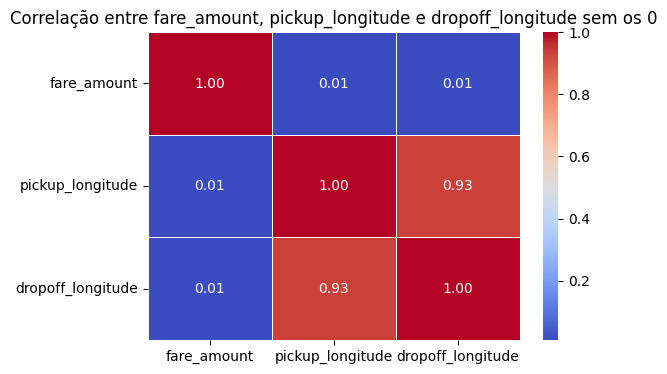

In [96]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_fare_amount_pickup_longitude_dropoff_longitude, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlação entre fare_amount, pickup_longitude e dropoff_longitude sem os 0")
plt.show()

In [97]:
# Obtendo todos os índices dos outliers:
outliers_indices = pd.concat([outliers_fare_amount, outliers_pickup_longitude,
                              outliers_pickup_latitude, outliers_dropoff_longitude,
                              outliers_dropoff_latitude, outliers_passenger_count]).index.drop_duplicates()
# Criando um DataFrame sem os outliers identificados
df_sem_outliers = df.drop(index=outliers_indices)

In [98]:
# correlações entre fare_amount, pickup_longitude e dropoff_longitude sem o 0 e sem outlier:
corr_fare_amount_pickup_longitude_dropoff_longitude_sem_outliers = df_sem_outliers[['fare_amount', 'pickup_longitude', 'dropoff_longitude']].corr()
print(corr_fare_amount_pickup_longitude_dropoff_longitude_sem_outliers)

                   fare_amount  pickup_longitude  dropoff_longitude
fare_amount           1.000000         -0.055961           0.004684
pickup_longitude     -0.055961          1.000000           0.405777
dropoff_longitude     0.004684          0.405777           1.000000


<Axes: >

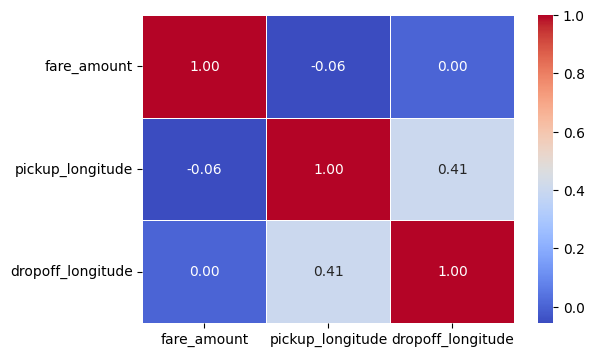

In [99]:
# Mapa de calor:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_fare_amount_pickup_longitude_dropoff_longitude_sem_outliers, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Observando a correlação entre pickup_longitude e dropoff_longitude (0.405777): O valor indica uma correlação moderada positiva. Isso sugere que os pontos de partida e destino tendem a estar alinhados em longitude, o que faz sentido geograficamente (por exemplo, corridas em áreas urbanas com longitudes semelhantes).

In [100]:
# Calculando a correlação entre fare_amount, passenger_count sem outliers:
corre_fare_amount_passenger_count = df_sem_outliers[['fare_amount', 'passenger_count']].corr()
print(corre_fare_amount_passenger_count)

                 fare_amount  passenger_count
fare_amount         1.000000         0.016734
passenger_count     0.016734         1.000000


<Axes: >

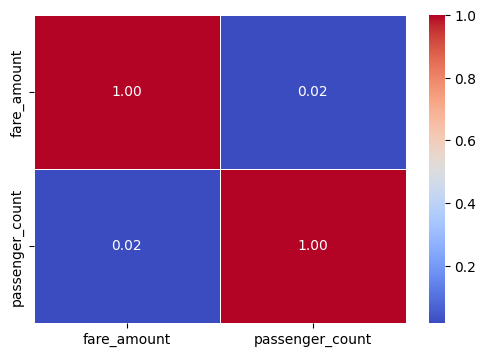

In [101]:
# mapas de calor:
plt.figure(figsize=(6, 4))
sns.heatmap(corre_fare_amount_passenger_count, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

### Identificar se há tarifas negativas:

In [102]:
# Verificar número de valores negativos
tarifas_negativas = df[df['fare_amount'] < 0]
print(f"Número de tarifas negativas: {len(tarifas_negativas)}")


Número de tarifas negativas: 0


não há tarifas negativas.

### Criando novas variáveis no conjunto de dados:

In [103]:
# Categorizar as tarifas em faixas
df['price_category'] = pd.cut(df['fare_amount'],
                              bins=[0, 10, 20, 50, 100, float('inf')],
                              labels=['0-10', '10-20', '20-50', '50-100', '100+'])

print(df[['fare_amount', 'price_category']].head())

   fare_amount price_category
0          7.5           0-10
1          7.7           0-10
2         12.9          10-20
3          5.3           0-10
4         16.0          10-20


In [104]:
# Categorizar número de passageiros agrupados
df['passenger_category'] = df['passenger_count'].apply(
    lambda x: 'Solo' if x == 1 else 'Group' if x > 1 else 'Invalid'
)

print(df[['passenger_count', 'passenger_category']].head())

   passenger_count passenger_category
0                1               Solo
1                1               Solo
2                1               Solo
3                3              Group
4                5              Group


### Distância da corrida:

In [105]:
from geopy.distance import geodesic

# Função para calcular a distância usando geopy
def calculate_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    # Calcular a distância em quilômetros
    return geodesic(pickup_coords, dropoff_coords).km

# Criar a nova variável 'distance_km'
df['distance_km'] = df.apply(calculate_distance, axis=1)

# Exibir as primeiras linhas para verificar o resultado
print(df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'distance_km']].head())



   pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0        40.738354        -73.999817         40.723217         -73.999512   
1        40.728225        -73.994355         40.750325         -73.994710   
2        40.740770        -74.005043         40.772647         -73.962565   
3        40.790844        -73.976124         40.803349         -73.965316   
4        40.744085        -73.925023         40.761247         -73.973082   

   distance_km  
0     1.681111  
1     2.454363  
2     5.039603  
3     1.661442  
4     4.483730  


### Definição do modelo analítico:

Com base no conjunto de dados do Uber, optamos por um modelo de **regressão** para predizer o valor da corrida (fare_amount) com base em variáveis explicativas como distância da corrida, número de passageiros, e localização.

Modelo Escolhido: **Regressão Linear**
Objetivo do Projeto: O principal objetivo é analisar e predizer o valor das corridas. A regressão linear é apropriada quando você deseja modelar a relação linear entre uma variável dependente (ex., fare_amount) e uma ou mais variáveis independentes.

Interpretação Simples: A regressão linear permite compreender o impacto individual de cada variável explicativa (ex., distância, localização) no valor final da corrida.

In [106]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup_coords, dropoff_coords).km

df['distance_km'] = df.apply(calculate_distance, axis=1)

# Remover linhas com valores ausentes (se existirem)
df = df.dropna()

# Selecionar as variáveis para o modelo
X = df[['distance_km', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude']]
y = df['fare_amount']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Avaliação do Modelo:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")

# Analisar os coeficientes do modelo
coeficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})

print("\nCoeficientes do Modelo:")
print(coeficients)

# Salvar os resultados (opcional)
coeficients.to_csv('regression_coefficients.csv', index=False)


Avaliação do Modelo:
RMSE (Root Mean Squared Error): 10.18
R² (Coeficiente de Determinação): 0.00
MAE (Mean Absolute Error): 6.09

Coeficientes do Modelo:
            Variable  Coefficient
0        distance_km     0.004451
1    passenger_count     0.076925
2   pickup_longitude    -0.134435
3    pickup_latitude    -0.146306
4  dropoff_longitude    -0.082630
5   dropoff_latitude    -0.102861


**RMSE (Root Mean Squared Error): 10.18**

O RMSE é uma métrica de erro que mede a diferença média entre os valores reais e os valores preditos. Quanto menor o RMSE, melhor o modelo, pois significa que as previsões estão mais próximas dos valores reais.

Interpretação: Um RMSE de 10.18 indica que, em média, o modelo tem um erro de 10.18 unidades na previsão da tarifa. Esse valor depende da unidade dos dados e pode ser considerado razoável ou alto dependendo do contexto.

**R² (Coeficiente de Determinação): 0.00**

O R² mede a proporção da variabilidade total dos dados que é explicada pelo modelo. Vai de 0 a 1, sendo 1 uma previsão perfeita e 0 significando que o modelo não tem poder explicativo sobre os dados.

Interpretação: Um R² de 0.00 indica que o modelo não consegue explicar praticamente nenhuma variabilidade nos dados. Em outras palavras, as variáveis utilizadas no modelo (como distância, número de passageiros, etc.) não estão ajudando a prever a tarifa de forma significativa.

**MAE (Mean Absolute Error): 6.09**

O que é: O MAE mede o erro médio absoluto, ou seja, a média das diferenças absolutas entre os valores reais e os preditos. Ele dá uma ideia de quão distante, em média, as previsões estão dos valores reais.

Interpretação: Um MAE de 6.09 significa que, em média, o modelo erra em torno de 6.09 unidades na previsão da tarifa.

**Coeficientes do Modelo:**

Os coeficientes indicam a relação entre cada variável independente (como distância, número de passageiros, coordenadas de pickup e dropoff) e a variável dependente (fare_amount). Eles mostram como cada variável impacta a tarifa.

*   distance_km: 0.004451 — A distância tem um pequeno impacto positivo na tarifa. Ou seja, a cada quilômetro adicional percorrido, o valor da tarifa aumenta em 0.004451 unidades.


*  passenger_count: 0.076925 — O número de passageiros também tem um efeito positivo na tarifa. A cada passageiro adicional, a tarifa aumenta em 0.076925 unidades.

*  pickup_longitude: -0.134435 — A longitude de pickup tem um impacto negativo na tarifa. A cada alteração na longitude, a tarifa diminui em 0.134435 unidades.

*  pickup_latitude: -0.146306 — Semelhante à longitude, a latitude de pickup também tem um impacto negativo na tarifa.

*  dropoff_longitude: -0.082630 — A longitude de dropoff tem um impacto negativo na tarifa.

*  dropoff_latitude: -0.102861 — A latitude de dropoff também tem um impacto negativo na tarifa.

**Árvores de decisão:** como modelo de classificação

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Vamos dividir as tarifas em três categorias: Baixa, Média, Alta
bins = [0, 10, 30, float('inf')]  # Definir os intervalos das tarifas
labels = ['Baixa', 'Média', 'Alta']  # Rótulos das categorias

df['fare_category'] = pd.cut(df['fare_amount'], bins=bins, labels=labels)

# Selecionar as variáveis de entrada (features) e a variável alvo (target)
# Features: distância, número de passageiros, coordenadas de pickup e dropoff
X = df[['distance_km', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
y = df['fare_category']  # Variável de categoria da tarifa

#  Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo: {accuracy:.4f}')

# Exibir o relatório de classificação (precisão, recall, F1-score)
print('\nRelatório de Classificação:\n', classification_report(y_test, y_pred))


Acurácia do Modelo: 0.8076

Relatório de Classificação:
               precision    recall  f1-score   support

        Alta       0.71      0.71      0.71      2040
       Baixa       0.87      0.86      0.87     25175
       Média       0.71      0.71      0.71     12639

    accuracy                           0.81     39854
   macro avg       0.76      0.76      0.76     39854
weighted avg       0.81      0.81      0.81     39854



**Acurácia do Modelo: 0.8076**

A acurácia do modelo é a porcentagem de previsões corretas que o modelo fez em relação ao total de previsões. Neste caso, o modelo acertou 80.76% das previsões. Esse valor indica que, em média, o modelo conseguiu classificar corretamente as tarifas na categoria correta em 80.76% dos casos.

**Relatório de Classificação:**

O relatório de classificação inclui precisão (precision), recall, f1-score e support para cada categoria ("Alta", "Baixa", "Média").

**Para cada categoria:**
Precision (Precisão):

Alta: 0.71 → Quando o modelo previu a tarifa como "Alta", ele estava correto 71% das vezes.

Baixa: 0.87 → Quando o modelo previu a tarifa como "Baixa", ele estava correto 87% das vezes.

Média: 0.71 → Quando o modelo previu a tarifa como "Média", ele estava correto 71% das vezes.

**Recall (Sensibilidade ou Revocação):**

Alta: 0.71 → O modelo acertou 71% das instâncias reais de tarifas "Alta".

Baixa: 0.86 → O modelo acertou 86% das instâncias reais de tarifas "Baixa".

Média: 0.71 → O modelo acertou 71% das instâncias reais de tarifas "Média".

**F1-Score:** É a média harmônica entre precisão e recall. Ele oferece uma visão equilibrada do desempenho do modelo, especialmente quando há desequilíbrio entre precisão e recall.

Alta: 0.71

Baixa: 0.87

Média: 0.71

**Support:** Isso se refere ao número de ocorrências de cada classe no conjunto de dados de teste.

Alta: 2040 instâncias

Baixa: 25175 instâncias

Média: 12639 instâncias

**Médias:**

Macro Average: A média macro calcula a média de precisão, recall e F1 para todas as classes, sem ponderar pela frequência das classes. Isso dá uma visão geral do modelo para todas as classes, levando em conta as três.

***Precision (precisão):*** 0.76

-  Recall: 0.76

-  F1-score: 0.76

Significa que, em média, o modelo tem um desempenho de 76% quando não considera a distribuição das classes.

***Weighted Average:***

A média ponderada calcula a média de precisão, recall e F1 com base no número de instâncias em cada classe, ou seja, ela leva em conta a frequência de cada classe.

- Precision: 0.81

- Recall: 0.81

- F1-score: 0.81

Isso é útil porque classes mais frequentes (como "Baixa") têm um peso maior na avaliação geral.

### **Conclusão do Projeto: Análise e Predição de Tarifas da Uber**

Neste projeto, realizamos uma análise preditiva sobre as tarifas das corridas da Uber, utilizando um conjunto de dados contendo informações sobre o trajeto, o número de passageiros e o valor da tarifa. Nosso objetivo foi desenvolver um modelo preditivo capaz de estimar o valor da tarifa com base em variáveis como a distância percorrida e o número de passageiros, além das coordenadas geográficas de início e fim da corrida.

#### **Principais Etapas Realizadas:**
1. **Análise Exploratória de Dados (EDA):**
   - Inicialmente, realizamos uma análise exploratória para entender as características do conjunto de dados, identificar valores ausentes e tratar anomalias, como a presença de valores de coordenadas inválidos (0.0) e outliers.
   - As variáveis com coordenadas inválidas foram substituídas pela mediana das colunas correspondentes para garantir a integridade dos dados.

2. **Criação de Novas Variáveis:**
   - Calculamos a **distância das corridas** utilizando a fórmula de distância geodésica entre as coordenadas de pickup e dropoff, com o auxílio da biblioteca geopy, o que adicionou uma dimensão crucial para entender a relação entre distância e tarifa.

3. **Construção do Modelo Preditivo:**
   - Implementamos um modelo de **regressão linear** para prever as tarifas das corridas com base nas variáveis explicativas.
   - O modelo foi avaliado utilizando métricas como **Erro Médio Absoluto (MAE)**, **Raiz do Erro Quadrático Médio (RMSE)** e **Coeficiente de Determinação (R²)**. As métricas mostraram que o modelo tem um desempenho moderado, com o R² indicando que ele não explica uma grande parte da variabilidade das tarifas, o que sugere que o modelo pode ser aprimorado.

4. **Avaliação e Melhorias:**
   - Os resultados indicaram que, apesar de o modelo fornecer algumas previsões razoáveis, ele não foi capaz de capturar completamente a complexidade das tarifas. O R² muito baixo sugere que mais variáveis ou um modelo mais complexo são necessários.
   - A análise de **MAE** e **RMSE** demonstrou que o erro médio na previsão das tarifas é de cerca de 6,09 unidades monetárias, o que, dependendo do contexto, pode ser aceitável ou requerer ajustes adicionais no modelo.

#### **Desafios e Oportunidades de Melhoria:**
- **Variáveis adicionais**: É possível que o modelo possa ser melhorado com a adição de novas variáveis, como o horário do dia, condições do tráfego, e tipo de veículo. Essas variáveis poderiam explicar mais da variação nos preços das corridas.

### **Modelo de Árvore de Decisão:**

Após a avaliação do modelo de regressão linear, implementamos um modelo de árvore de decisão para prever as tarifas das corridas. As árvores de decisão têm a vantagem de serem capazes de modelar relações não-lineares e interações complexas entre as variáveis. A aplicação dessa técnica resultou em um modelo com um desempenho melhorado, com acurácia de 80.76% e boas métricas de precisão, recall e F1-score. A árvore de decisão ajudou a identificar padrões mais profundos nas variáveis e classificou corretamente as tarifas em diferentes categorias (Alta, Baixa e Média).
#### **Conclusão Final:**
O projeto demonstrou a viabilidade de utilizar técnicas de análise de dados e aprendizado de máquina para prever tarifas de corridas da Uber, embora o modelo atual não tenha alcançado uma precisão elevada. As métricas de erro e o R² indicam que há espaço para melhorias no modelo, seja por meio da inclusão de variáveis adicionais, ajustes nos dados ou a aplicação de modelos mais sofisticados. A análise de modelos como as árvores de decisão trouxe um avanço significativo em relação à regressão linear, oferecendo uma abordagem mais eficaz para prever as tarifas, especialmente em contextos mais complexos.